In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

In [2]:
sales = pd.read_csv('data/superstore-sales.csv', encoding='unicode_escape')
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
print('Total purchases: ', sales['Row ID'].count())
print('Total orders: ', sales['Order ID'].nunique())
print('Total customers: ', sales['Customer ID'].nunique())
print('Total sales: ', round(sales['Sales'].sum() / 1000000, 2))

Total purchases:  9800
Total orders:  4922
Total customers:  793
Total sales:  2.26


We are analyzing 9800 purchases across 4922 orders by 793 customers, totalling sales of 2.26 million pounds.

In [4]:
sales.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

We have 11 records with NaN values but as the missing data relates to Postal Code it will not have a negative impact on our product sales analysis so we will not remove them from the dataset.

In [5]:
sales.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

## Engineering

In [6]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

sales['Order Day of Week'] = pd.DatetimeIndex(sales['Order Date']).dayofweek
sales['Order Month'] = pd.DatetimeIndex(sales['Order Date']).month
sales['Order Year'] = pd.DatetimeIndex(sales['Order Date']).year
sales['Order Month Year'] = sales['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

sales['Sales (k)'] = sales['Sales'] / 1000

## Date Analysis

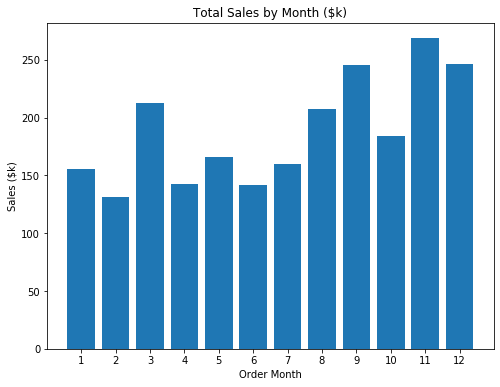

In [7]:
sales_by_month = sales.groupby(by=['Order Month'], as_index=False).sum()

x = sales_by_month['Order Month']
y = sales_by_month['Sales (k)']

plt.figure(figsize=(8, 6))
plt.xticks(x)
plt.xlabel('Order Month')
plt.ylabel('Sales ($k)')
plt.title('Total Sales by Month ($k)')

plt.bar(x, y)
plt.show()

We can see September, November and December produce the highest sales. November and December could be related to Christmas however, September is likely to be driven from a different factor - perhaps the company spent more on marketing or there were particular promotional offers that boosted sales?

Conversely we can see February offered the lowest sales, followed by April and June.

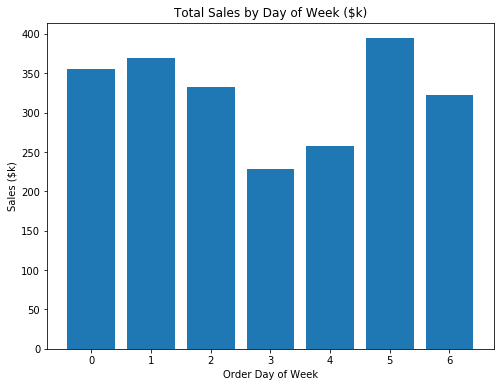

In [8]:
sales_by_week_day = sales.groupby(by=['Order Day of Week'], as_index=False).sum()

x = sales_by_week_day['Order Day of Week']
y = sales_by_week_day['Sales (k)']

plt.figure(figsize=(8, 6))
plt.xticks(x)
plt.xlabel('Order Day of Week')
plt.ylabel('Sales ($k)')
plt.title('Total Sales by Day of Week ($k)')

plt.bar(x, y)
plt.show()

Saturday generates our highest sales followed by Tuesday. Wednesday does not generate as many sales, perhaps we could consider encouraging promotional offers to boost sales.

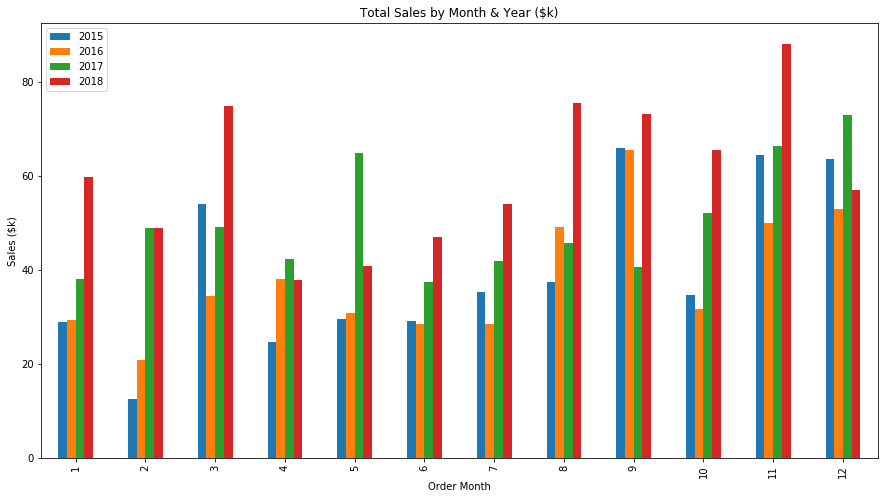

In [9]:
sales_by_month_year = sales.groupby(by=['Order Month', 'Order Year'], as_index=False).sum()
sales_by_month_year = sales_by_month_year.pivot(index='Order Month', columns='Order Year', values='Sales (k)')

sales_by_month_year.plot(kind='bar', figsize=(15, 8))

plt.xlabel('Order Month')
plt.ylabel('Sales ($k)')
plt.title('Total Sales by Month & Year ($k)')
plt.legend(loc='upper left')
plt.show()

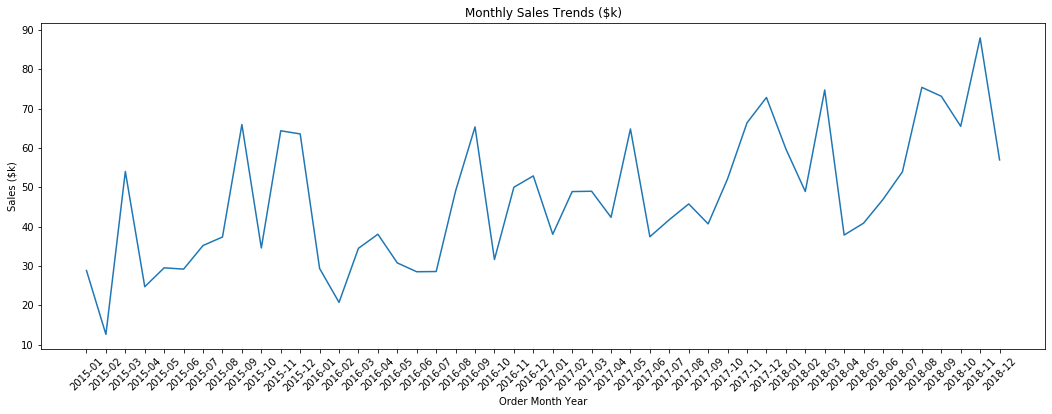

In [10]:
sales_by_month_year = sales.groupby(by=['Order Month Year'], as_index=False).sum()

x = sales_by_month_year['Order Month Year']
y = sales_by_month_year['Sales (k)']

plt.figure(figsize=(18, 6))
plt.xticks(rotation = 45)
plt.xlabel('Order Month Year')
plt.ylabel('Sales ($k)')
plt.title('Monthly Sales Trends ($k)')

plt.plot(x, y)
plt.show()

## Geographical Analysis

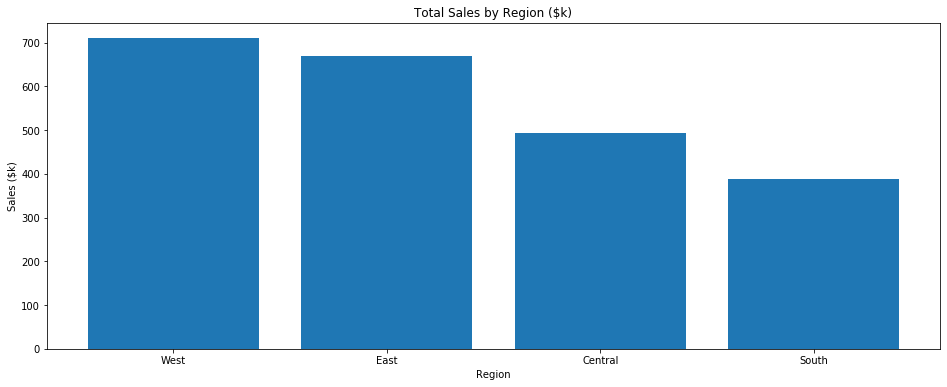

In [11]:
sales_by_state = sales.groupby(by=['Region'], as_index=False).sum()
sales_by_state = sales_by_state.sort_values(['Sales (k)'], ascending=False)

x = sales_by_state['Region']
y = sales_by_state['Sales (k)']

plt.figure(figsize=(16, 6))
plt.xlabel('Region')
plt.ylabel('Sales ($k)')
plt.title('Total Sales by Region ($k)')

plt.bar(x, y)
plt.show()

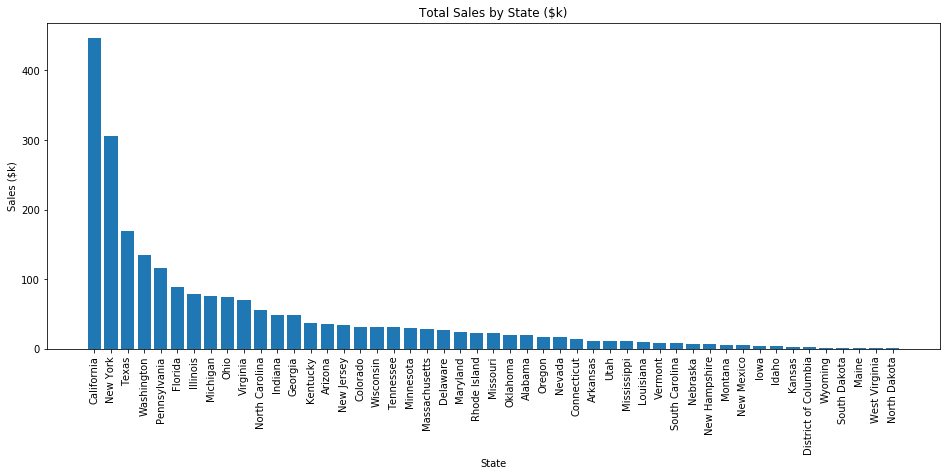

In [12]:
sales_by_state = sales.groupby(by=['State'], as_index=False).sum()
sales_by_state = sales_by_state.sort_values(['Sales (k)'], ascending=False)

x = sales_by_state['State']
y = sales_by_state['Sales (k)']

plt.figure(figsize=(16, 6))
plt.xticks(rotation='vertical')
plt.xlabel('State')
plt.ylabel('Sales ($k)')
plt.title('Total Sales by State ($k)')

plt.bar(x, y)
plt.show()

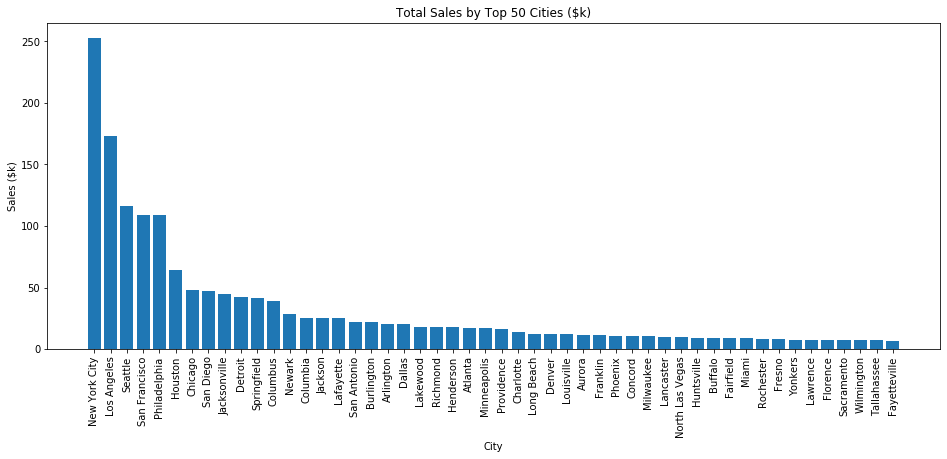

In [13]:
sales_by_city = sales.groupby(by=['City'], as_index=False).sum()
sales_by_city = sales_by_city.sort_values(['Sales (k)'], ascending=False)
sales_by_city = sales_by_city.head(50)

x = sales_by_city['City']
y = sales_by_city['Sales (k)']

plt.figure(figsize=(16, 6))
plt.xticks(rotation='vertical')
plt.xlabel('City')
plt.ylabel('Sales ($k)')
plt.title('Total Sales by Top 50 Cities ($k)')

plt.bar(x, y)
plt.show()

## Product Analysis

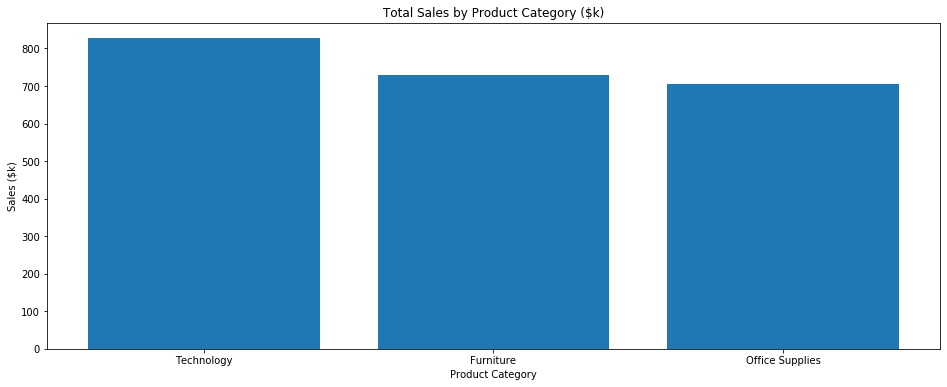

In [14]:
sales_by_category = sales.groupby(by=['Category'], as_index=False).sum()
sales_by_category = sales_by_category.sort_values(['Sales (k)'], ascending=False)

x = sales_by_category['Category']
y = sales_by_category['Sales (k)']

plt.figure(figsize=(16, 6))
plt.xlabel('Product Category')
plt.ylabel('Sales ($k)')
plt.title('Total Sales by Product Category ($k)')

plt.bar(x, y)
plt.show()

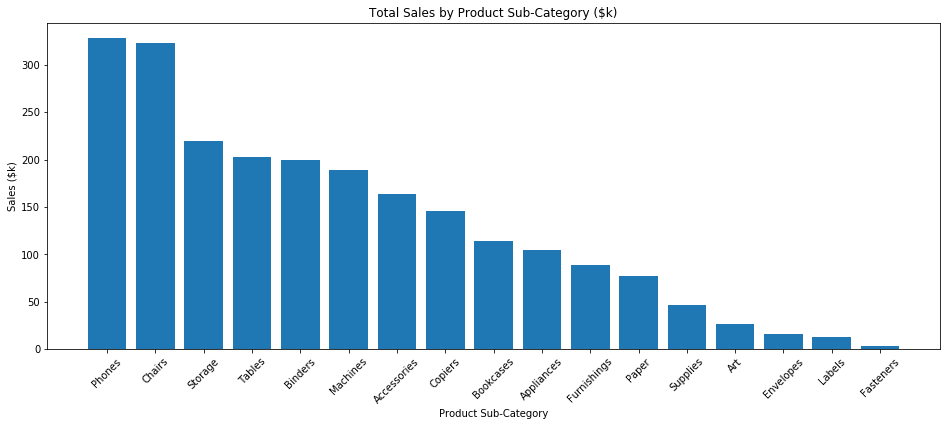

In [15]:
sales_by_sub_category = sales.groupby(by=['Sub-Category'], as_index=False).sum()
sales_by_sub_category = sales_by_sub_category.sort_values(['Sales (k)'], ascending=False)

x = sales_by_sub_category['Sub-Category']
y = sales_by_sub_category['Sales (k)']

plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
plt.xlabel('Product Sub-Category')
plt.ylabel('Sales ($k)')
plt.title('Total Sales by Product Sub-Category ($k)')

plt.bar(x, y)
plt.show()

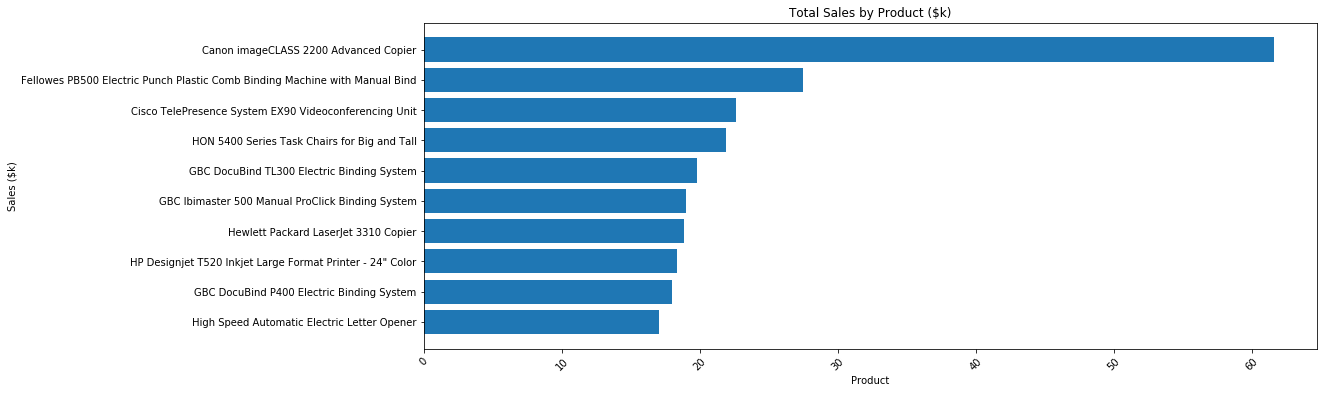

In [16]:
sales_by_product = sales.groupby(by=['Product Name'], as_index=False).sum()
sales_by_product = sales_by_product.sort_values(['Sales (k)'], ascending=False)
sales_by_product = sales_by_product.head(10)

x = sales_by_product['Product Name']
y = sales_by_product['Sales (k)']

plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
plt.xlabel('Product')
plt.ylabel('Sales ($k)')
plt.title('Total Sales by Product ($k)')

plt.barh(x, y)
plt.gca().invert_yaxis()
plt.show()

### What products are sold together?

In [17]:
sales_bundle = sales[sales['Order ID'].duplicated(keep=False)]
sales_bundle['Product Bundle'] = sales_bundle.groupby('Order ID')['Product Name'].transform(lambda x: ','.join(x))
sales_bundle = sales_bundle[['Order ID', 'Product Bundle']].drop_duplicates()

/Users/metinalisho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
count = Counter()

for row in sales_bundle['Product Bundle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('Acco Pressboard Covers with Storage Hooks', ' 14 7/8" x 11"'), 16),
 (('Acco Pressboard Covers with Storage Hooks', ' Executive Red'), 15),
 (('Adams Telephone Message Book W/Dividers/Space For Phone Numbers',
   ' 5 1/4"X8 1/2"'),
  14),
 (('Hot File 7-Pocket', ' Floor Stand'), 12),
 ((' Chisel Tip', ' Yellow'), 11),
 ((' Black', ' Black'), 11),
 (('Avery 4027 File Folder Labels for Dot Matrix Printers',
   ' 5000 Labels per Box'),
  11),
 (('Avery 4027 File Folder Labels for Dot Matrix Printers', ' White'), 11),
 ((' 5000 Labels per Box', ' White'), 11),
 (('Global Leather Highback Executive Chair with Pneumatic Height Adjustment',
   ' Black'),
  11)]